In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 12.6 MB/s 
     |████████████████████████████████| 596 kB 61.9 MB/s 
     |████████████████████████████████| 6.6 MB 54.2 MB/s 
     |████████████████████████████████| 101 kB 14.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
xtrain = torch.load('./drive/MyDrive/MLProject/xtrainconvnext.pt',map_location=torch.device('cpu'))
ytrain = torch.load('./drive/MyDrive/MLProject/ytrainconvnext.pt',map_location=torch.device('cpu'))
xtest = torch.load('./drive/MyDrive/MLProject/xtestconvnext.pt',map_location=torch.device('cpu'))
ytest = torch.load('./drive/MyDrive/MLProject/ytestconvnext.pt',map_location=torch.device('cpu'))

In [5]:
len(xtrain)

12500

In [6]:
xtrain[0].logits

tensor([[-0.0970, -0.2797, -0.2374,  ...,  0.2035, -0.1968, -0.2819],
        [-0.0668,  0.4410, -0.7452,  ...,  0.0150, -0.2125,  0.2795],
        [ 0.2108, -0.0450, -0.7191,  ..., -0.2082, -0.2974,  0.1566],
        [-0.4496, -0.4706, -0.8118,  ..., -0.5422,  0.5650,  0.3224]])

In [7]:
xtest[0].logits

tensor([[-1.9773e-01, -7.0178e-02, -3.7201e-01,  1.7608e-01,  1.9039e-01,
         -2.0810e-01, -7.4339e-02, -2.5052e-01,  1.5424e-01, -5.7588e-02,
          5.0018e-01, -1.6397e-02, -4.3196e-01, -5.2352e-02, -6.6966e-01,
          8.0492e-02, -1.0220e-01, -8.6355e-02, -7.3400e-01,  2.5742e-01,
          1.0769e-01, -5.2853e-01,  1.1252e-01, -1.2042e-01,  3.3263e-02,
          1.4191e-01,  1.5133e-01,  5.8903e-01, -1.4762e-01, -4.2799e-02,
         -9.6434e-02,  9.9700e-02,  2.9185e-01, -6.5392e-02, -1.5473e-01,
          8.7884e-02,  1.1074e-01, -2.7604e-01,  3.5598e-01, -1.7493e-01,
         -2.8661e-01,  6.7609e-02, -8.9845e-01,  7.2487e-01,  1.2117e-01,
          4.5008e-01, -7.8046e-02, -7.1369e-02,  4.3883e-01, -1.4440e-01,
         -1.7897e-01, -2.9359e-01, -1.8736e-01,  1.6721e+00, -1.1190e-01,
          2.4245e-01, -5.2655e-01, -6.1564e-01,  1.6131e-01, -1.4596e-01,
         -1.4417e-02, -2.5069e-01, -1.4239e-01,  2.2931e-01, -4.9707e-03,
          1.2725e-01, -3.2255e-01,  2.

In [8]:
ytrain[0]

tensor([9, 3, 8, 2])

In [9]:
ytest[0]

tensor([3])

In [10]:
xtrain1 = []
for num, item in enumerate(xtrain):
  xtrain1.append(xtrain[num].logits)
xtest1 = []
for num, item in enumerate(xtest):
  xtest1.append(xtest[num].logits)

In [11]:
xtrain = xtrain1
xtest = xtest1

In [12]:
xtrain = torch.stack(xtrain)
xtrain.size()

torch.Size([12500, 4, 768])

In [13]:
ytrain = torch.stack(ytrain)
ytrain.size()

torch.Size([12500, 4])

In [14]:
xtest = torch.stack(xtest)
xtest.size()

torch.Size([10000, 1, 768])

In [15]:
ytest = torch.stack(ytest)
ytest.size()

torch.Size([10000, 1])

In [16]:
xtrain = xtrain.cpu()
xtrain = xtrain.numpy()
xtrain = xtrain.T.reshape(768,50000)

In [17]:
xtrain.shape

(768, 50000)

In [18]:
ytrain = ytrain.cpu()
ytrain = ytrain.numpy()
ytrain = ytrain.T.reshape(1,50000)

In [19]:
ytrain.shape

(1, 50000)

In [20]:
xtest = xtest.cpu()
xtest = xtest.numpy()
xtest = xtest.T.reshape(768,10000)

In [21]:
xtest.shape

(768, 10000)

In [22]:
ytest = ytest.cpu()
ytest = ytest.numpy()
ytest = ytest.T.reshape(1,10000)

In [23]:
ytest.shape

(1, 10000)

In [24]:
ytrain = ytrain.flatten()

In [25]:
xtrain = xtrain.T

In [26]:
xtrain.shape

(50000, 768)

In [27]:
ytrain.shape

(50000,)

In [28]:
xtest = xtest.T

In [29]:
ytest = ytest.flatten()

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
cross_val_predicted = cross_val_predict(model, xtrain, ytrain, cv=4)
print(metrics.accuracy_score(ytrain, cross_val_predicted))
print(metrics.classification_report(ytrain, cross_val_predicted))

0.9851
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5000
           1       1.00      0.98      0.99      5000
           2       0.96      1.00      0.98      5000
           3       1.00      0.97      0.98      5000
           4       1.00      0.98      0.99      5000
           5       0.91      1.00      0.95      5000
           6       1.00      0.98      0.99      5000
           7       1.00      0.97      0.98      5000
           8       1.00      0.99      1.00      5000
           9       1.00      0.99      0.99      5000

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



In [32]:
print("Accuracy on Test set using NB: ",model.score(xtest,ytest))

Accuracy on Test set using NB:  0.9596


In [33]:
ypred = model.predict(xtest)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

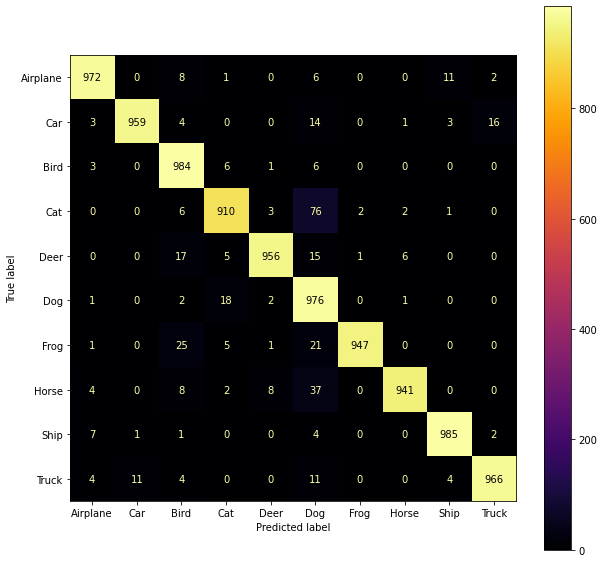

In [35]:
cm = confusion_matrix(ytest, ypred)
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticklabels(classes)
disp = disp.plot(ax=ax,cmap='inferno')
plt.show()